# Curating datasets

**Author(s):** Miguel Xochicale [@mxochicale](https://github.com/mxochicale)   
**Contributors:** 

## Introduction
This notebook presents prototypes for demographic analysis of participants.

### Running notebook

Go to repository path: `cd $HOME/repositories/budai4medtech/midi2023/data`   
Open repo in pycharm and in the terminal type:
```
git checkout master # or the branch
git pull # to bring a local branch up-to-date with its remote version
```
Launch Notebook server:
```
conda activate *VE
jupyter notebook --browser=firefox
```
which will open your web-browser.


### Logbook
* 19-May-2023: adds notebook 
* 30-May-2023: Fix tranformation warning by adding antialias https://pytorch.org/vision/main/generated/torchvision.transforms.Resize.html#torchvision.transforms.Resize 


### References
* FETAL_PLANES_DB: Common maternal-fetal ultrasound images.    
The final dataset is comprised of over 12,400 images from 1,792 patients. 
https://zenodo.org/record/3904280



# 2. Jupyter Notebook
## 2.1 Setting imports and datasets paths

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io


import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.utils as vutils

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]

REPOSITORY_PATH='repositories/datasets/FETAL_PLANES_ZENODO/'
FULL_REPO_DATA_PATH = HOME_PATH+'/'+REPOSITORY_PATH

# Root directory for dataset
dataroot = FULL_REPO_DATA_PATH + "Images/"
ref = FULL_REPO_DATA_PATH + "FETAL_PLANES_DB_data.csv"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Printing Versions and paths
print(f'FULL_REPO_DATA_PATH: {FULL_REPO_DATA_PATH}' )
print(f'Device: {device}')



# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)


FULL_REPO_DATA_PATH: /home/mxochicale/repositories/datasets/FETAL_PLANES_ZENODO/
Device: cuda:0
Random Seed:  999


In [2]:
class FetalPlaneDataset(Dataset):
    """Fetal Plane dataset."""

    def __init__(self, root_dir, ref, 
                 plane, 
                 brain_plane=None, 
                 us_machine=None, 
                 operator_number=None, 
                 transform=None
                ):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
            plane: 'Fetal brain'; 'Fetal thorax'; 'Maternal cervix'; 'Fetal femur'; 'Fetal thorax'; 'Other'
            brain_plane: 'Trans-ventricular'; 'Trans-thalamic'; 'Trans-cerebellum'
            us_machine: 'Voluson E6';'Voluson S10'
            operator_number: 'Op. 1'; 'Op. 2'; 'Op. 3';'Other'
            
        return image
        """
        self.root_dir = root_dir
        self.ref = pd.read_csv(ref, sep=';')
        self.ref = self.ref[self.ref['Plane'] == plane]
        if plane == 'Fetal brain':
            self.ref = self.ref[self.ref['Brain_plane'] == brain_plane]
        if us_machine is not None:
            self.ref = self.ref[self.ref['US_Machine'] == us_machine]
        if operator_number is not None:
            self.ref = self.ref[self.ref['Operator'] == operator_number]

        self.transform = transform

    def __len__(self):
        return len(self.ref)

    def __getitem__(self, idx):
        
        #print(f'idx: {idx} \n')
        #print(f'self.ref.iloc[idx, 0]: {self.ref.iloc[idx, 0]} \n')
       
        img_name = os.path.join(self.root_dir,
                                self.ref.iloc[idx, 0] + '.png')
        #print(img_name)
        
        image = io.imread(img_name)
        
        #print(type(image))
        #print(image.dtype)

        if self.transform:
            image = self.transform(image)

        return image

lenght 134
torch.Size([4, 1, 512, 512])


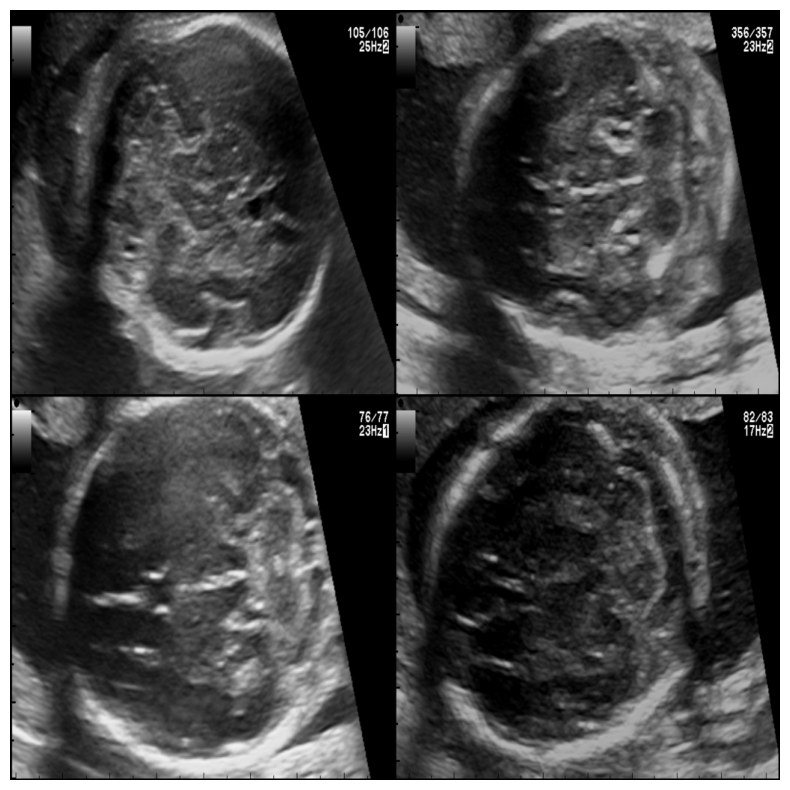

In [5]:


##Plane
plane = 'Fetal brain'
# plane = 'Fetal thorax'
# plane = 'Maternal cervix'
# plane = 'Fetal femur'
# plane = 'Fetal thorax'
# plane = 'Other'

operator_number = None
# operator_number = 'Op. 1'
# operator_number = 'Op. 2'
# operator_number = 'Op. 3'
# operator_number = 'Other'

# us_machine = None
# us_machine = 'Voluson E6'
# us_machine = 'Voluson S10'


# brain_plane = 'Trans-ventricular'; us_machine = 'Voluson E6' ###len: 408 
# brain_plane = 'Trans-ventricular';us_machine = 'Voluson S10' ###len: 59 
# brain_plane = 'Trans-ventricular'; us_machine = 'Aloka' ###len: 112 
# brain_plane = 'Trans-ventricular'; us_machine = 'Other' ###len: 18

# brain_plane = 'Trans-thalamic'; us_machine = 'Voluson E6' ###len: 1072 
# brain_plane = 'Trans-thalamic'; us_machine = 'Voluson S10' ###len: 123 
# brain_plane = 'Trans-thalamic'; us_machine = 'Aloka' ###len: 360 
# brain_plane = 'Trans-thalamic'; us_machine = 'Other' ###len: 83 

# brain_plane = 'Trans-cerebellum'; us_machine = 'Voluson E6' ###len: 492 
# brain_plane = 'Trans-cerebellum'; us_machine = 'Voluson S10' ###len: 68 
brain_plane = 'Trans-cerebellum'; us_machine = 'Aloka' ###len: 134 
# brain_plane = 'Trans-cerebellum'; us_machine = 'Other' ###len: 20 


# image_size = 28
# image_size = 64
image_size = 512

# Number of workers for dataloader
workers = 8

# Batch size during training
# batch_size = 2
#batch_size = 3
batch_size = 4
# batch_size = 8
#batch_size = 16
#batch_size = 128

SHUFFLE_T = True
SHUFFLE_F = False


transform_operations=transforms.Compose([
                        transforms.ToTensor(),
                        #mt.RandRotate(range_x=0.1, prob=0.5),
                        #mt.RandZoom(prob=0.5, min_zoom=1, max_zoom=1.1),
                        #mt.Resize([image_size, image_size]),
                        transforms.Resize([image_size, image_size], antialias=True),
                        transforms.Normalize((0.5), (0.5)), #mean=0.5, std=0.5
                        ])

dataset = FetalPlaneDataset(root_dir=dataroot,
                            ref=ref,
                            plane=plane,
                            brain_plane=brain_plane,
                            us_machine=us_machine,
                            operator_number=operator_number,
                            transform=transform_operations)

number_of_images = dataset.__len__()
print(f'lenght {number_of_images}')

dataloader = DataLoader(dataset, 
                        batch_size=batch_size,
                        shuffle=SHUFFLE_T, 
                        num_workers=workers)

## Plot some training images
real_batch = next(iter(dataloader))
print(real_batch.shape)

plt.figure(figsize=(10,10))
plt.axis("off")
# plt.title(f'Images from {plane}')
grid_images=vutils.make_grid(real_batch.to(device)[:64], nrow=2, padding=2, normalize=True)
plt.imshow(np.transpose(grid_images.cpu(),(1,2,0)))
plt.show()


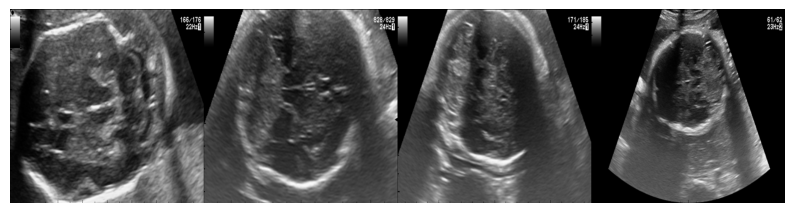

In [6]:
## Displaying dataloader content
len_dataloader = len(dataloader)

for batch_idx, batch in enumerate(dataloader):  #iterate through each batch    
    if batch_idx % 50 == 0:
        #print(f'batch_idx: {batch_idx}; \
        #      sampled images in the batch: { batch_idx*batch_size } of {number_of_images}')
        #print(batch.shape)
        img = batch
        #print(f'    img.shape: {img.shape}') #torch.Size([BATCH_SIZE, 1, 64, 64])
        #print(f'    img.dtype: {img.dtype}') #torch.Size([BATCH_SIZE, 1, 64, 64])

        grid_img = vutils.make_grid(img, nrow=4, padding=0, normalize=True)
        #print(f'    grid_img.shape: {grid_img.shape}')#torch.Size([3, 482, 242])
        
        plt.figure(figsize=(10,10))
        plt.axis("off")
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy()  ) 
        #plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy().astype("float32")) 
        plt.show()